## Heart Disease Analysis
https://www.kaggle.com/competitions/k-means-clustering-for-heart-disease-analysis/ 

Explore the possibility of grouping patients based on common characteristics using unsupervised learning techniques. Specifically, investigate the use of k-means algorithm. By employing this method,  identify clusters of patients with similar attributes, facilitating targeted treatment strategies.

In [17]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import os
import matplotlib.pyplot as plt

### read data

In [18]:
for dirname, _, filenames in os.walk('k-means-clustering-for-heart-disease-analysis'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

k-means-clustering-for-heart-disease-analysis\heart_disease.csv
k-means-clustering-for-heart-disease-analysis\sample.csv


In [19]:
data = pd.read_csv('k-means-clustering-for-heart-disease-analysis\heart_disease.csv')
submission = pd.read_csv('k-means-clustering-for-heart-disease-analysis\sample.csv')

In [20]:
data.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
0,0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect
1,1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal
2,2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect
3,3,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal
4,4,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal


### basic info check

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
dtypes: float64(5), int64(2), object(8)
memory usage: 107.9+ KB


In [22]:
data.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000
mean,459.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653
min,0.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,229.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000
50%,459.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000
75%,689.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000
max,919.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000


### missing value check

In [23]:
data.isna().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
dtype: int64

### visulization of columns data distribustion

C:\Users\michael.shen\AppData\Local\Temp\ipykernel_6124\706415979.py:4: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  plt.hist(data[{col}], bins='auto', edgecolor='black')


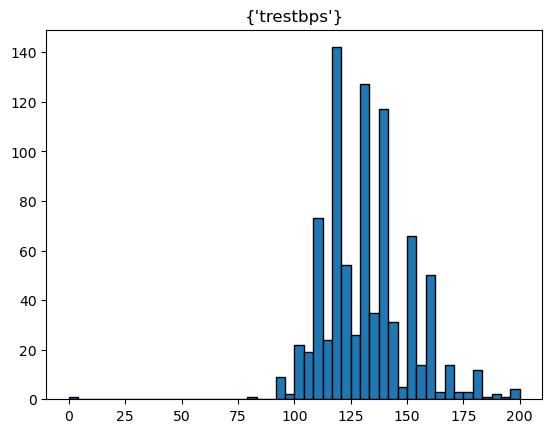

C:\Users\michael.shen\AppData\Local\Temp\ipykernel_6124\706415979.py:4: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  plt.hist(data[{col}], bins='auto', edgecolor='black')


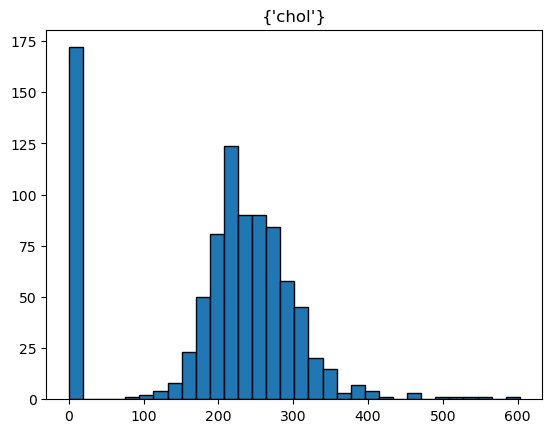

C:\Users\michael.shen\AppData\Local\Temp\ipykernel_6124\706415979.py:4: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  plt.hist(data[{col}], bins='auto', edgecolor='black')


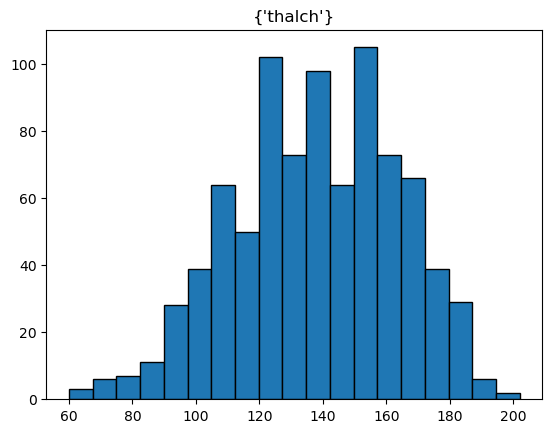

C:\Users\michael.shen\AppData\Local\Temp\ipykernel_6124\706415979.py:4: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  plt.hist(data[{col}], bins='auto', edgecolor='black')


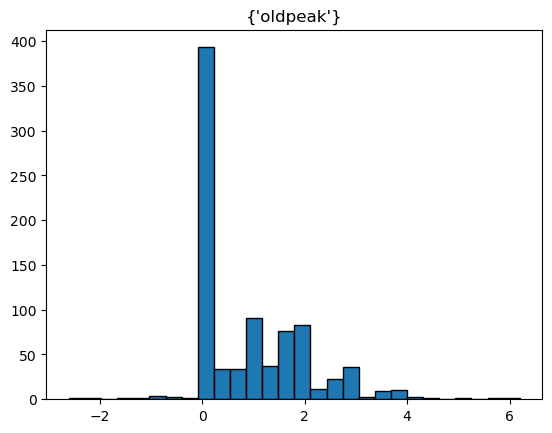

C:\Users\michael.shen\AppData\Local\Temp\ipykernel_6124\706415979.py:4: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  plt.hist(data[{col}], bins='auto', edgecolor='black')


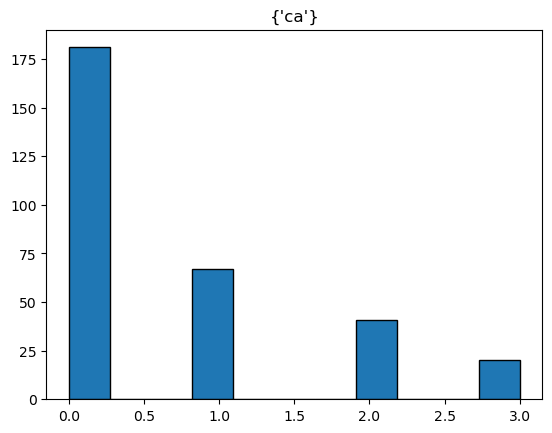

In [24]:
num_col = ['trestbps','chol', 'thalch','oldpeak','ca']
for col in num_col:
    # Plotting the distribution of numerical column
    plt.hist(data[{col}], bins='auto', edgecolor='black')
    plt.title({col})
    plt.show()

### work on missing values

In [25]:
# exang & fbs both columns have true and false value so we can impute them randomly
# Columns to impute missing values
columns_to_impute = ['fbs', 'exang']

# Iterate over the columns
for column in columns_to_impute:
    # Check if column has missing values
    if  data[column].isnull().any():
        # Get indices of missing values
        missing_indices = data[data[column].isnull()].index
        # Randomly impute missing values with True or False
        random_values = np.random.choice([True, False], size=len(missing_indices))
        data.loc[missing_indices, column] = random_values

        
        
# thal and slope columns contain more categories as well as both contain high number of missisng values so creating another category

# Columns to impute missing values
columns_to_impute = ['slope', 'thal']

# Iterate over the columns
for column in columns_to_impute:
    # Check if column has missing values
    if  data[column].isnull().any():
        # Replace missing values with 'NotKnown'
         data[column].fillna('NotKnown', inplace=True)
        
        
# column restecg contain only 2 missing values impute them by normal calss(mode)
col2impute = ['restecg']
for column in col2impute:
    # Check if column has missing values
    if  data[column].isnull().any():
        # Replace missing values with 'NotKnown'
         data[column].fillna('normal', inplace=True)

In [26]:
# Columns to impute missing values
cat_col_mean = ['trestbps','chol', 'thalch','oldpeak','ca']

# Iterate over the columns
for column in cat_col_mean:
    # Check if column has missing values
    if  data[column].isnull().any():
        # Calculate mean
        mean_value =  data[column].mean()
        # Impute missing values with mean
        data[column].fillna(mean_value, inplace=True)

In [27]:
#Drop id and exists
data.drop(['id'], axis=1, inplace=True)

In [28]:
data

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
0,63,Male,Cleveland,typical angina,145.000000,233.0,True,lv hypertrophy,150.000000,False,2.300000,downsloping,0.000000,fixed defect
1,67,Male,Cleveland,asymptomatic,160.000000,286.0,False,lv hypertrophy,108.000000,True,1.500000,flat,3.000000,normal
2,67,Male,Cleveland,asymptomatic,120.000000,229.0,False,lv hypertrophy,129.000000,True,2.600000,flat,2.000000,reversable defect
3,37,Male,Cleveland,non-anginal,130.000000,250.0,False,normal,187.000000,False,3.500000,downsloping,0.000000,normal
4,41,Female,Cleveland,atypical angina,130.000000,204.0,False,lv hypertrophy,172.000000,False,1.400000,upsloping,0.000000,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54,Female,VA Long Beach,asymptomatic,127.000000,333.0,True,st-t abnormality,154.000000,False,0.000000,NotKnown,0.676375,NotKnown
916,62,Male,VA Long Beach,typical angina,132.132404,139.0,False,st-t abnormality,137.545665,True,0.878788,NotKnown,0.676375,NotKnown
917,55,Male,VA Long Beach,asymptomatic,122.000000,223.0,True,st-t abnormality,100.000000,False,0.000000,NotKnown,0.676375,fixed defect
918,58,Male,VA Long Beach,asymptomatic,132.132404,385.0,True,lv hypertrophy,137.545665,False,0.878788,NotKnown,0.676375,NotKnown


In [16]:
data.isna().sum()

age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64

### Encoding

In [29]:
for col in  data:
    print(col,  data[col].dtype)

age int64
sex object
dataset object
cp object
trestbps float64
chol float64
fbs object
restecg object
thalch float64
exang object
oldpeak float64
slope object
ca float64
thal object


In [30]:
from sklearn.preprocessing import OrdinalEncoder
#The input to this transformer should be an array-like of integers or strings, denoting the values taken on by categorical (discrete) features. The features are converted to ordinal integers. This results in a single column of integers (0 to n_categories - 1) per feature.
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html
enc = OrdinalEncoder()

for col in data:
    if data[col].dtype == 'object':
        data[col] = data[col].astype(str)
        # transform from 1d to 2d for OrdinalEncoder input
        data[col] = enc.fit_transform(data[col].values.reshape(-1,1))
        
data

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
0,63,1.0,0.0,3.0,145.000000,233.0,1.0,0.0,150.000000,0.0,2.300000,1.0,0.000000,1.0
1,67,1.0,0.0,0.0,160.000000,286.0,0.0,0.0,108.000000,1.0,1.500000,2.0,3.000000,2.0
2,67,1.0,0.0,0.0,120.000000,229.0,0.0,0.0,129.000000,1.0,2.600000,2.0,2.000000,3.0
3,37,1.0,0.0,2.0,130.000000,250.0,0.0,1.0,187.000000,0.0,3.500000,1.0,0.000000,2.0
4,41,0.0,0.0,1.0,130.000000,204.0,0.0,0.0,172.000000,0.0,1.400000,3.0,0.000000,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54,0.0,3.0,0.0,127.000000,333.0,1.0,2.0,154.000000,0.0,0.000000,0.0,0.676375,0.0
916,62,1.0,3.0,3.0,132.132404,139.0,0.0,2.0,137.545665,1.0,0.878788,0.0,0.676375,0.0
917,55,1.0,3.0,0.0,122.000000,223.0,1.0,2.0,100.000000,0.0,0.000000,0.0,0.676375,1.0
918,58,1.0,3.0,0.0,132.132404,385.0,1.0,0.0,137.545665,0.0,0.878788,0.0,0.676375,0.0


### looking for the proper cluster number

In [37]:
from sklearn.cluster import KMeans

#initialize kmeans parameters
kmeans_kwargs = {
"init": "k-means++",
"n_init": 10,
"random_state": 42,
}

#create list to hold SSE values for each k
sse = []
for k in range(1, 16):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(data)
    sse.append(kmeans.inertia_)


C:\Users\michael.shen\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


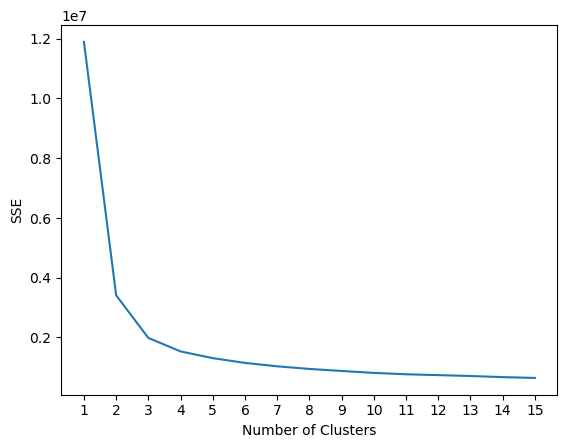

In [38]:
#visualize results
plt.plot(range(1, 16), sse)
plt.xticks(range(1, 16))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [41]:
#instantiate the k-means class, using optimal number of clusters
kmeans = KMeans(init="k-means++", n_clusters=4, n_init=10, random_state=42)

#fit k-means algorithm to data
kmeans.fit(data)

data['clusterID'] = kmeans.labels_

In [43]:
data.head()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,clusterID
0,63,1.0,0.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,1.0,0.0,1.0,2
1,67,1.0,0.0,0.0,160.0,286.0,0.0,0.0,108.0,1.0,1.5,2.0,3.0,2.0,0
2,67,1.0,0.0,0.0,120.0,229.0,0.0,0.0,129.0,1.0,2.6,2.0,2.0,3.0,2
3,37,1.0,0.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,1.0,0.0,2.0,0
4,41,0.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,3.0,0.0,2.0,2


### Visualise clusters  through dimensionality reduction using PCA 

In [45]:
data.drop(columns=['clusterID'],inplace=True)

In [47]:
data.head()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
0,63,1.0,0.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,1.0,0.0,1.0
1,67,1.0,0.0,0.0,160.0,286.0,0.0,0.0,108.0,1.0,1.5,2.0,3.0,2.0
2,67,1.0,0.0,0.0,120.0,229.0,0.0,0.0,129.0,1.0,2.6,2.0,2.0,3.0
3,37,1.0,0.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,1.0,0.0,2.0
4,41,0.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,3.0,0.0,2.0


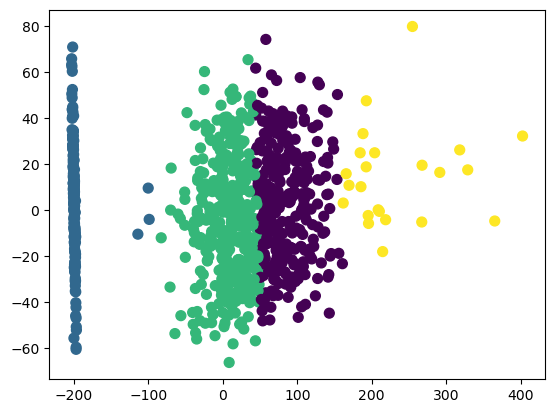

In [51]:
#PCA, is a statistical procedure that allows you to summarize the information content in large data tables by means of a smaller set of “summary indices” that can be more easily visualized and analyzed.
from sklearn.decomposition import PCA

#reduce the dataset to 2 dimensions (i.e., n_components=2), making it easier to visualize.
pca = PCA(2) 

#Apply PCA transformation to the dataset heart_data, reducing its dimensions from its original size to (n, 2).
pca_data = pca.fit_transform(data)

x = pca_data[:,0]
y = pca_data[:,1]

plt.scatter(x, y, c=kmeans.labels_, s=50, cmap='viridis')

 